In [183]:
# imports
%load_ext autoreload
%autoreload 2
from arima_forecast import *
import matplotlib.pyplot as plt

In [181]:
ser = get_data("msft")

In [185]:
train, test = train_test_split(ser, train_size=0.75)

In [186]:
preds, model = fit(train, test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

In [189]:
rmse(obs=test, preds=preds)

0.021954807746902588

In [192]:
df = generate_forecasts(obs=test, preds=preds, model=model, n=5)

<AxesSubplot:xlabel='Date'>

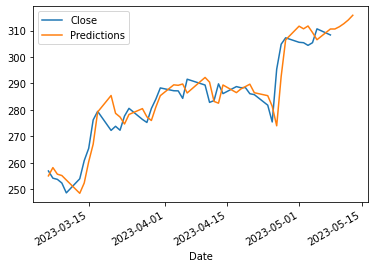

In [193]:
df[-50:].plot()